In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pessoas_Df = pd.read_csv("dataset\DATASET.CSV",delimiter=';')

In [3]:
df_tmp = pessoas_Df
df_tmp

,Primeiro Nome,Sobrenomes,Peso (kg),Altura (m)
0,felipe,neves da hora,"70,6","1,69"
1,sandro,barbosa,"90,5","1,73"
2,maycon,da silva ferreira,"100,01","1,82"
3,jeferson,Oliveira,"80,04","1,75"
4,manuel,gomes vieira,"63,05","1,8"
...,...,...,...,...
94,Luna,Lunara Lua,70,"1,86"
95,hulk,jose,"35,5","1,2"
96,maria,gomes,"58,05","1,56"
97,paulo,rocha,"98,07",2


In [4]:
df_tmp['Peso (kg)'] = df_tmp['Peso (kg)'].str.replace(',', '.').astype(float)
df_tmp['Altura (m)'] = df_tmp['Altura (m)'].str.replace(',', '.').astype(float)

In [5]:
df_tmp.head()

,Primeiro Nome,Sobrenomes,Peso (kg),Altura (m)
0,felipe,neves da hora,70.60,1.69
1,sandro,barbosa,90.50,1.73
2,maycon,da silva ferreira,100.01,1.82
3,jeferson,Oliveira,80.04,1.75
4,manuel,gomes vieira,63.05,1.80


In [41]:
def calcular_imc(df):
    df['Peso (kg)'] = df['Peso (kg)'].fillna(0)
    df['Altura (m)'] = df['Altura (m)'].fillna(0)
    # Iterar pelas linhas do DataFrame
    for i, row in df.iterrows():
        df.at[i, 'Primeiro Nome'] = row['Primeiro Nome'].upper()
        df.at[i, 'Sobrenomes'] = row['Sobrenomes'].upper()
        if row['Peso (kg)'] == 0 or row['Altura (m)'] == 0:
            df.at[i, 'IMC'] = 0.0
        else:
            df.at[i, 'IMC'] = round(row['Peso (kg)'] / (row['Altura (m)'] ** 2), 2)
    return df

In [42]:
def mostrar_dados(df):
    # Selecionar e retornar as colunas desejadas
    return df[['Primeiro Nome', 'Sobrenomes', 'IMC']]

In [43]:
calcular_imc(df_tmp)
df_tmp

,Primeiro Nome,Sobrenomes,Peso (kg),Altura (m),IMC
0,FELIPE,NEVES DA HORA,70.60,1.69,24.72
1,SANDRO,BARBOSA,90.50,1.73,30.24
2,MAYCON,DA SILVA FERREIRA,100.01,1.82,30.19
3,JEFERSON,OLIVEIRA,80.04,1.75,26.14
4,MANUEL,GOMES VIEIRA,63.05,1.80,19.46
...,...,...,...,...,...
94,LUNA,LUNARA LUA,70.00,1.86,20.23
95,HULK,JOSE,35.50,1.20,24.65
96,MARIA,GOMES,58.05,1.56,23.85
97,PAULO,ROCHA,98.07,2.00,24.52


In [44]:
df_resultado = mostrar_dados(df_tmp)


In [45]:
df_resultado.to_csv('resultado_imc.txt', sep='\t', index=False)

C:\Users\Luis\AppData\Local\Temp\ipykernel_16120\178436404.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado['Classificação IMC'] = df_resultado['IMC'].apply(classificar_imc)


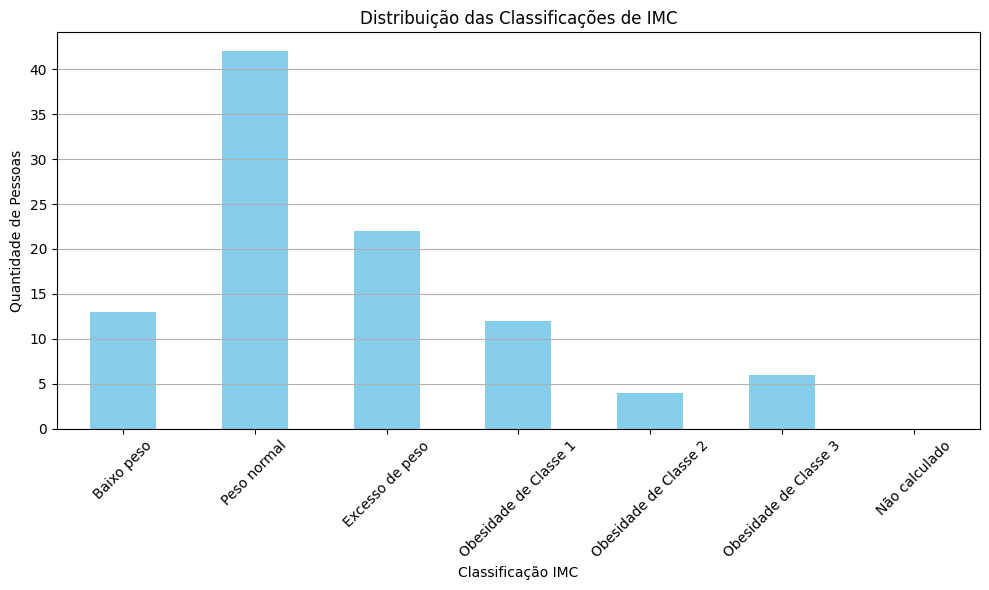

In [46]:
def classificar_imc(imc):
    if imc is None:
        return 'Não calculado'
    elif imc < 18.5:
        return 'Baixo peso'
    elif 18.5 <= imc <= 24.9:
        return 'Peso normal'
    elif 25.0 <= imc <= 29.9:
        return 'Excesso de peso'
    elif 30.0 <= imc <= 34.9:
        return 'Obesidade de Classe 1'
    elif 35.0 <= imc <= 39.9:
        return 'Obesidade de Classe 2'
    else:
        return 'Obesidade de Classe 3'

# Aplicar a classificação no DataFrame
df_resultado['Classificação IMC'] = df_resultado['IMC'].apply(classificar_imc)

# Contar a quantidade de pessoas em cada categoria
contagem = df_resultado['Classificação IMC'].value_counts().reindex([
    'Baixo peso',
    'Peso normal',
    'Excesso de peso',
    'Obesidade de Classe 1',
    'Obesidade de Classe 2',
    'Obesidade de Classe 3',
    'Não calculado'
], fill_value=0)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Classificações de IMC')
plt.xlabel('Classificação IMC')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [47]:
contagem = df_resultado['Classificação IMC'].value_counts()
print(contagem)

Peso normal              42
Excesso de peso          22
Baixo peso               13
Obesidade de Classe 1    12
Obesidade de Classe 3     6
Obesidade de Classe 2     4
Name: Classificação IMC, dtype: int64
